In [1]:
from create_data import DumbCirc as dc
from create_data_single import Dumb as db
from augsuq import AugmentedSUQ as auq
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_instance = dc(0.5, 0.5, 0.25, 22)
fpc, fnc, pc, lp, tc, lt = data_instance.create_dataset(50, 1, [50], [0.2], True)

In [3]:
import torch
torch.manual_seed(1)
fpc, fnc, pc, lp, tc, lt = torch.tensor(fpc), torch.tensor(fnc), torch.tensor(pc), torch.tensor(lp), torch.tensor(tc), torch.tensor(lt)

In [4]:
model_zero = auq(point_cloud=fpc, partial_cloud=pc, test_partial=tc, train_labels=lp, mapping_dim=6, count_labels=2, negative_cloud=fnc)

In [5]:
use_cuda = torch.cuda.is_available()
#device = torch.device("cuda" if use_cuda else "cpu")
device = "cpu"
model_zero.set_device(device)

In [6]:
model_zero.train(num_epochs=10, batch_size=20, learning_rate=0.0001)

C:\Users\Acer\Documents\All_of_RWTH\ThesisTarget\1MYWORK\thesis_notebooks\augsuq.py:186: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3679.)
  + posterior_mean_pos.T @ torch.linalg.inv(posterior_var_pos) @ posterior_mean_pos


Epoch:0, Loss: 14.758514995872975
Epoch:1, Loss: 3.4223613446950916
Epoch:2, Loss: 4.215509203195571
Epoch:3, Loss: 2.3090006125956775
Epoch:4, Loss: -805.5288237166803
Epoch:5, Loss: -160.9481572550019
Epoch:6, Loss: -32.53959919818203
Epoch:7, Loss: 6.614106867595592
Epoch:8, Loss: 0.9297019176451522
Epoch:9, Loss: 21.993564199065528


In [7]:
model_zero.set_test_data(tc, lt)

tensor([[1.0000e+00, 9.8924e-01, 9.5823e-01,  ..., 2.4590e-01, 2.3785e-05,
         4.3410e-02],
        [9.8924e-01, 1.0000e+00, 9.8951e-01,  ..., 3.0193e-01, 2.8553e-05,
         6.0876e-02],
        [9.5823e-01, 9.8951e-01, 1.0000e+00,  ..., 3.6152e-01, 3.2526e-05,
         8.3203e-02],
        ...,
        [2.4590e-01, 3.0193e-01, 3.6152e-01,  ..., 1.0000e+00, 1.2351e-04,
         6.5809e-01],
        [2.3785e-05, 2.8553e-05, 3.2526e-05,  ..., 1.2351e-04, 1.0000e+00,
         4.5032e-05],
        [4.3410e-02, 6.0876e-02, 8.3203e-02,  ..., 6.5809e-01, 4.5032e-05,
         1.0000e+00]], grad_fn=<AddBackward0>)
tensor([ 1.3319e-02,  1.2420e-02,  1.0797e-02,  ...,  8.4927e-04,
         7.8519e-05, -3.3144e-04], grad_fn=<MvBackward0>)


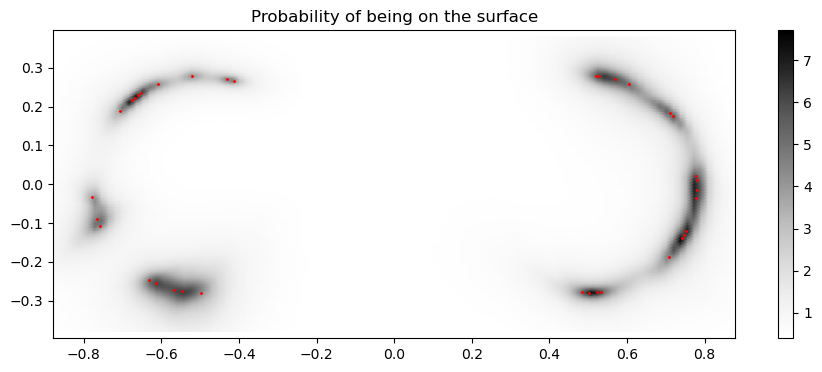

In [8]:
model_zero.predict()

In [9]:
model_zero.set_test_data(pc[2:4, :], lp[2:4, :])

tensor([[1.0000e+00, 9.8928e-01, 9.5827e-01,  ..., 3.4120e-10, 1.7560e-11,
         9.6754e-05],
        [9.8928e-01, 1.0000e+00, 9.8949e-01,  ..., 8.0628e-10, 4.3500e-11,
         1.5646e-04],
        [9.5827e-01, 9.8949e-01, 1.0000e+00,  ..., 1.8233e-09, 1.0286e-10,
         2.4233e-04],
        ...,
        [3.4120e-10, 8.0628e-10, 1.8233e-09,  ..., 1.0000e+00, 4.8312e-01,
         1.9402e-04],
        [1.7560e-11, 4.3500e-11, 1.0286e-10,  ..., 4.8312e-01, 1.0000e+00,
         5.2579e-06],
        [9.6754e-05, 1.5646e-04, 2.4233e-04,  ..., 1.9402e-04, 5.2579e-06,
         1.0000e+00]], grad_fn=<AddBackward0>)
tensor([-0.0017, -0.0020, -0.0021,  ...,  0.0089,  0.0073,  0.0056],
       grad_fn=<MvBackward0>)
tensor([[1.0000e+00, 9.6984e-01, 8.8120e-01,  ..., 6.6790e-02, 5.1770e-03,
         5.3622e-08],
        [9.6984e-01, 1.0000e+00, 9.6690e-01,  ..., 8.1458e-02, 6.6440e-03,
         1.8126e-07],
        [8.8120e-01, 9.6690e-01, 1.0000e+00,  ..., 8.5703e-02, 7.1400e-03,
         6.2

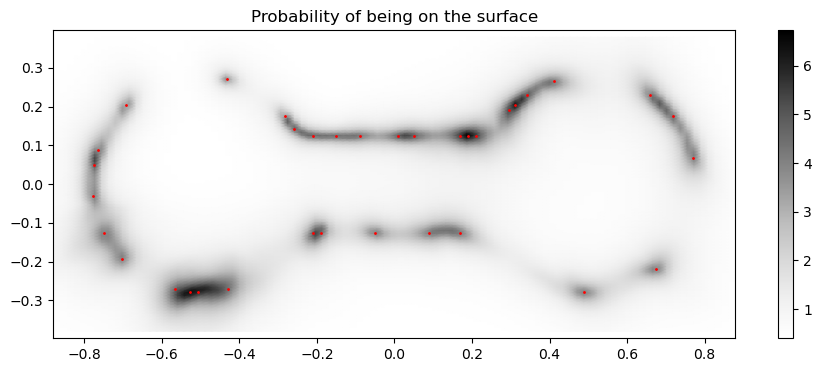

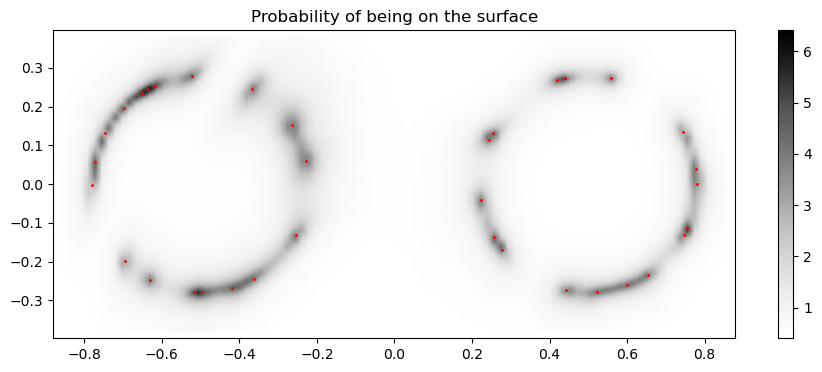

In [10]:
model_zero.predict()

In [11]:
model_bin = auq(point_cloud=fpc, partial_cloud=pc, test_partial=tc, train_labels=lp,  mapping_dim=6, count_labels=2, negative_cloud=fnc)

In [12]:
device = "cpu"
model_bin.set_device(device)

In [13]:
model_bin.train(num_epochs=10, batch_size=20, learning_rate=0.0001, kind='b')

Epoch:0, Loss: 62.02038421630859
Epoch:1, Loss: 84.08343017578125
Epoch:2, Loss: 84.7310048828125
Epoch:3, Loss: 78.12810710449219
Epoch:4, Loss: 57.24927101806641
Epoch:5, Loss: 70.7480063642578
Epoch:6, Loss: 104.33266477993163
Epoch:7, Loss: 82.31593557439453
Epoch:8, Loss: 76.78448075501562
Epoch:9, Loss: 70.42809404223848


In [14]:
model_bin.set_test_data(tc, lt)

tensor([[1.0000e+00, 9.9297e-01, 9.7331e-01,  ..., 1.3418e-01, 5.8445e-04,
         1.4846e-02],
        [9.9297e-01, 1.0000e+00, 9.9352e-01,  ..., 1.6203e-01, 6.3564e-04,
         1.9595e-02],
        [9.7331e-01, 9.9352e-01, 1.0000e+00,  ..., 1.9114e-01, 6.7658e-04,
         2.5148e-02],
        ...,
        [1.3418e-01, 1.6203e-01, 1.9114e-01,  ..., 1.0000e+00, 1.6776e-02,
         6.2914e-01],
        [5.8445e-04, 6.3564e-04, 6.7658e-04,  ..., 1.6776e-02, 1.0000e+00,
         1.1738e-02],
        [1.4846e-02, 1.9595e-02, 2.5148e-02,  ..., 6.2914e-01, 1.1738e-02,
         1.0000e+00]], grad_fn=<AddBackward0>)
tensor([-0.0038, -0.0031, -0.0020,  ..., -0.0031, -0.0021, -0.0014],
       grad_fn=<MvBackward0>)


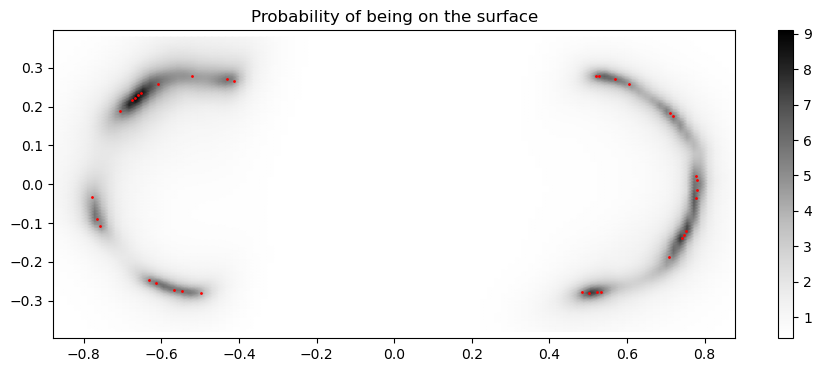

In [15]:
model_bin.predict()

In [16]:
model_bin.get_posterior_test(tc[0])

tensor([[1.0000e+00, 5.4218e-01, 1.0972e-09,  ..., 1.1326e-10, 3.6192e-08,
         6.4655e-09],
        [5.4218e-01, 1.0000e+00, 2.1445e-12,  ..., 5.5312e-13, 1.0025e-10,
         5.1278e-11],
        [1.0972e-09, 2.1445e-12, 1.0000e+00,  ..., 1.8654e-02, 7.2323e-01,
         6.3274e-03],
        ...,
        [1.1326e-10, 5.5312e-13, 1.8654e-02,  ..., 1.0000e+00, 4.2387e-02,
         6.5259e-01],
        [3.6192e-08, 1.0025e-10, 7.2323e-01,  ..., 4.2387e-02, 1.0000e+00,
         2.8502e-02],
        [6.4655e-09, 5.1278e-11, 6.3274e-03,  ..., 6.5259e-01, 2.8502e-02,
         1.0000e+00]], grad_fn=<AddBackward0>)
tensor([-1.2329e-02,  1.3495e-03, -2.2035e-03, -2.5652e-03,  1.7189e-03,
        -7.1551e-03, -1.0203e-02,  5.0173e-03, -2.8395e-03, -5.0053e-03,
         6.9175e-03,  5.4784e-03, -6.2484e-03, -1.1672e-03, -2.0056e-03,
         7.4027e-03,  1.1571e-03,  1.9335e-04, -2.8323e-03,  1.1887e-05,
        -1.6590e-03,  2.8195e-03, -4.4114e-03, -1.4735e-03, -1.1181e-02,
         3.0315

In [17]:
model_bin.get_posterior_test(fpc[1])

tensor([[1.0000e+00, 3.2298e-04, 3.3293e-06,  ..., 2.4416e-02, 8.6461e-03,
         1.7540e-01],
        [3.2298e-04, 1.0000e+00, 1.2548e-11,  ..., 1.9574e-02, 5.2956e-01,
         4.7191e-03],
        [3.3293e-06, 1.2548e-11, 1.0000e+00,  ..., 1.7855e-11, 5.2483e-09,
         1.6886e-09],
        ...,
        [2.4416e-02, 1.9574e-02, 1.7855e-11,  ..., 1.0000e+00, 2.9077e-02,
         6.3522e-01],
        [8.6461e-03, 5.2956e-01, 5.2483e-09,  ..., 2.9077e-02, 1.0000e+00,
         1.9425e-02],
        [1.7540e-01, 4.7191e-03, 1.6886e-09,  ..., 6.3522e-01, 1.9425e-02,
         1.0000e+00]], grad_fn=<AddBackward0>)
tensor([ 1.6761e-02, -1.3776e-02, -1.9274e-03, -2.4759e-03, -5.3827e-04,
         1.8449e-02,  2.3167e-02, -1.5209e-02, -2.1988e-04, -6.6858e-03,
        -5.8982e-03, -1.6266e-02, -2.0688e-03, -3.6876e-03,  2.4976e-02,
         2.1343e-02, -1.9743e-03,  6.7631e-03, -1.1154e-02,  3.2084e-02,
        -5.0048e-03,  1.2969e-03, -1.1143e-02,  1.9052e-04, -1.3133e-02,
         2.0722

In [18]:
model_bin.set_test_data(pc[7:11, :], lp[7:11, :])

tensor([[1.0000e+00, 9.8847e-01, 9.5688e-01,  ..., 9.0548e-16, 7.9370e-03,
         1.3057e-13],
        [9.8847e-01, 1.0000e+00, 9.8958e-01,  ..., 2.1218e-15, 9.9469e-03,
         3.0250e-13],
        [9.5688e-01, 9.8958e-01, 1.0000e+00,  ..., 4.8174e-15, 1.1916e-02,
         6.6108e-13],
        ...,
        [9.0548e-16, 2.1218e-15, 4.8174e-15,  ..., 1.0000e+00, 1.0973e-11,
         1.2782e-02],
        [7.9370e-03, 9.9468e-03, 1.1916e-02,  ..., 1.0973e-11, 1.0000e+00,
         1.4280e-07],
        [1.3057e-13, 3.0250e-13, 6.6108e-13,  ..., 1.2782e-02, 1.4280e-07,
         1.0000e+00]], grad_fn=<AddBackward0>)
tensor([ 0.0005,  0.0007,  0.0010,  ..., -0.0109, -0.0058, -0.0011],
       grad_fn=<MvBackward0>)
tensor([[1.0000e+00, 9.9296e-01, 9.7315e-01,  ..., 3.6896e-19, 2.0597e-01,
         4.9183e-18],
        [9.9296e-01, 1.0000e+00, 9.9345e-01,  ..., 5.7871e-19, 2.3977e-01,
         8.3966e-18],
        [9.7315e-01, 9.9345e-01, 1.0000e+00,  ..., 8.7606e-19, 2.7299e-01,
         1.3

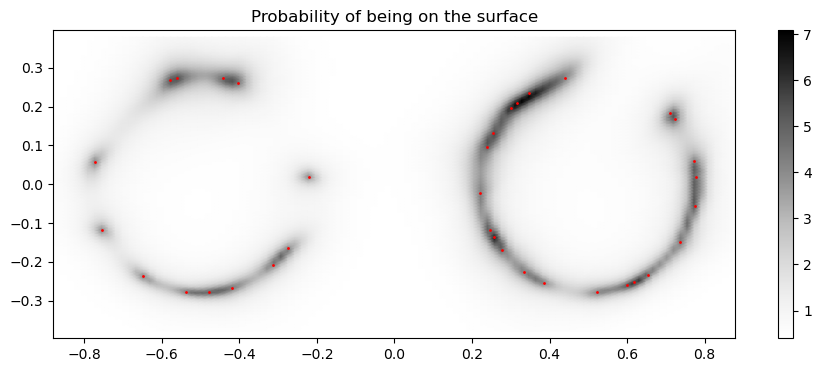

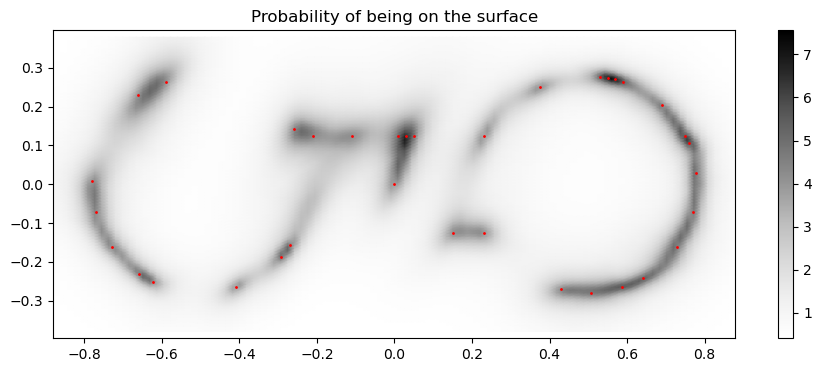

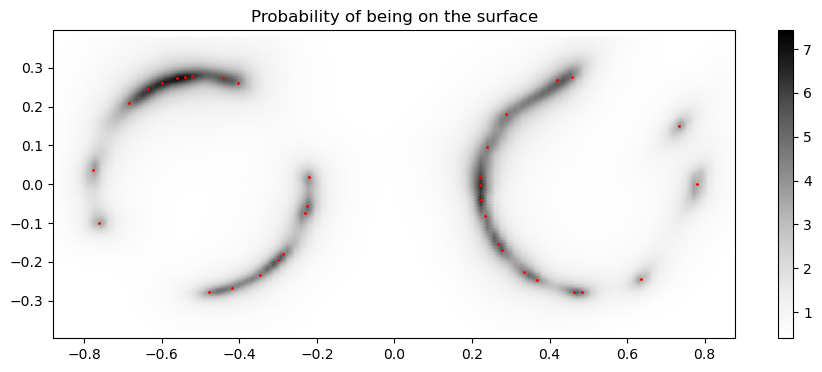

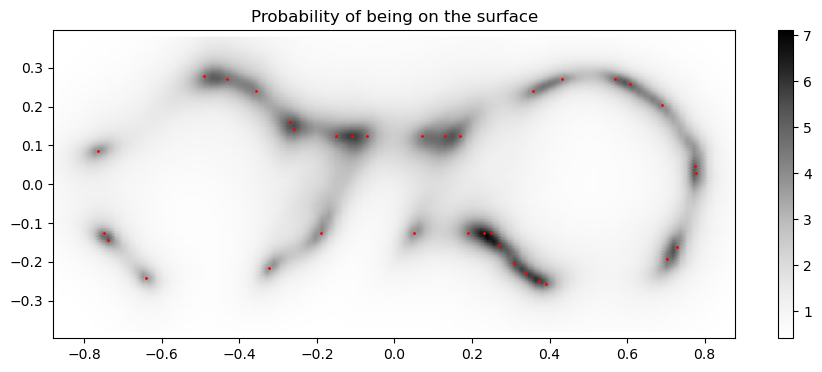

In [19]:
model_bin.predict()

In [31]:
data_instance = db(0.5, 0.5, 0.25, 2)
fpc, fnc, pc, lp, tc, lt = data_instance.create_dataset(50, 1, [50], [0.2], True)

In [32]:
torch.manual_seed(226)
fpc, fnc, pc, lp, tc, lt = torch.tensor(fpc), torch.tensor(fnc), torch.tensor(pc), torch.tensor(lp), torch.tensor(tc), torch.tensor(lt)

In [33]:
model_bin = auq(point_cloud=fpc, partial_cloud=pc, test_partial=tc, train_labels=lp,  mapping_dim=6, negative_cloud=fnc)

In [34]:
device = "cpu"
model_bin.set_device(device)

In [36]:
model_bin.train(num_epochs=10, batch_size=20, learning_rate=0.0005, kind='b')

_LinAlgError: linalg.inv: The diagonal element 159 is zero, the inversion could not be completed because the input matrix is singular.

In [ ]:
model_bin.set_test_data(tc, lt)

In [ ]:
model_bin.predict()

In [ ]:
model_bin.set_test_data(pc[10:12, :], lp[10:12, :])

In [ ]:
model_bin.predict()